In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder


In [2]:
data = pd.read_csv('carprices.csv')

In [3]:
df = data.copy()

In [4]:
df

,Car Model,Mileage,Sell Price($),Age(yrs)
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3
2,BMW X5,57000,26100,5
3,BMW X5,22500,40000,2
4,BMW X5,46000,31500,4
5,Audi A5,59000,29400,5
6,Audi A5,52000,32000,5
7,Audi A5,72000,19300,6
8,Audi A5,91000,12000,8
9,Mercedez Benz C class,67000,22000,6


In [5]:
df.describe()

,Mileage,Sell Price($),Age(yrs)
count,13.000000,13.000000,13.000000
mean,60884.615385,26023.076923,5.307692
std,19185.665055,8003.661021,1.652504
min,22500.000000,12000.000000,2.000000
25%,52000.000000,20000.000000,5.000000
50%,59000.000000,26100.000000,5.000000
75%,72000.000000,32000.000000,6.000000
max,91000.000000,40000.000000,8.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Car Model      13 non-null     object
 1   Mileage        13 non-null     int64 
 2   Sell Price($)  13 non-null     int64 
 3   Age(yrs)       13 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 548.0+ bytes


<Axes: xlabel='Mileage', ylabel='Sell Price($)'>

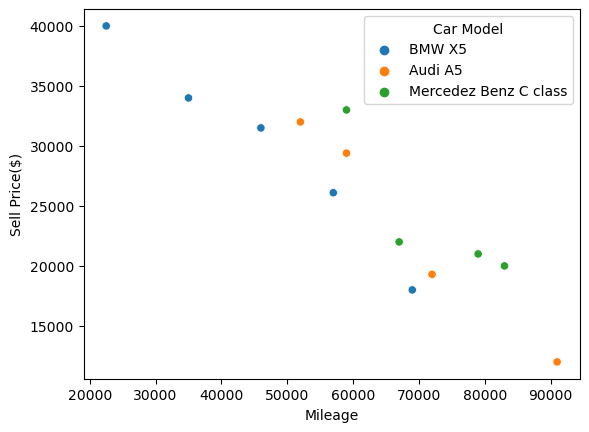

In [7]:

sns.scatterplot(x='Mileage', y='Sell Price($)', hue='Car Model', data=df)


<Axes: xlabel='Age(yrs)', ylabel='Sell Price($)'>

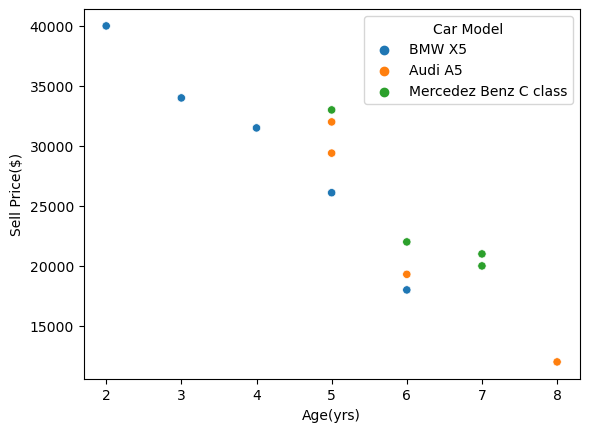

In [8]:
sns.scatterplot(data=df,x='Age(yrs)',y='Sell Price($)', hue='Car Model')

In [9]:
le = LabelEncoder()

In [10]:
df['Car Model'] = le.fit_transform(df['Car Model'])

In [11]:
X = df[['Car Model','Mileage','Age(yrs)']].values

In [12]:
y = df[['Sell Price($)']].values

In [13]:

ct = ColumnTransformer(
    transformers=[
        ("encoder", OneHotEncoder(), [0])
    ],
    remainder="passthrough"  
)

dft = ct.fit_transform(X)

In [14]:
dft

array([[0.00e+00, 1.00e+00, 0.00e+00, 6.90e+04, 6.00e+00],
       [0.00e+00, 1.00e+00, 0.00e+00, 3.50e+04, 3.00e+00],
       [0.00e+00, 1.00e+00, 0.00e+00, 5.70e+04, 5.00e+00],
       [0.00e+00, 1.00e+00, 0.00e+00, 2.25e+04, 2.00e+00],
       [0.00e+00, 1.00e+00, 0.00e+00, 4.60e+04, 4.00e+00],
       [1.00e+00, 0.00e+00, 0.00e+00, 5.90e+04, 5.00e+00],
       [1.00e+00, 0.00e+00, 0.00e+00, 5.20e+04, 5.00e+00],
       [1.00e+00, 0.00e+00, 0.00e+00, 7.20e+04, 6.00e+00],
       [1.00e+00, 0.00e+00, 0.00e+00, 9.10e+04, 8.00e+00],
       [0.00e+00, 0.00e+00, 1.00e+00, 6.70e+04, 6.00e+00],
       [0.00e+00, 0.00e+00, 1.00e+00, 8.30e+04, 7.00e+00],
       [0.00e+00, 0.00e+00, 1.00e+00, 7.90e+04, 7.00e+00],
       [0.00e+00, 0.00e+00, 1.00e+00, 5.90e+04, 5.00e+00]])

In [15]:
lr = LinearRegression()
lr.fit(X,y)

LinearRegression()

In [16]:
lr.score(X,y)

0.8719970367825952

In [17]:
lr.predict([[0,40000,5]])

array([[33443.92946269]])

In [18]:
import pickle
with open('model','wb') as f:
  pickle.dump(lr,f)

In [19]:
model=pickle.load(open('model.pkl','rb'))

In [20]:
model.score(X,y)

0.8719970367825953